In [1]:
import pandas as pd
import string
import nltk
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer #計算TF-IDF 套件
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import time

In [2]:
document_1 = "This is the first sentence"
document_2 = "This is my second sentence"
document_3 = "Is this my third sentence"
corpus = [document_1, document_2, document_3]
for i in range(3):
    corpus[i]=corpus[i].lower()
print(corpus)

['this is the first sentence', 'this is my second sentence', 'is this my third sentence']


In [3]:
data=pd.read_csv(r'C:\downloded dataset\nlp article\blogtext.csv')#,encoding = 'ISO-8859-1'
data=data['text'].iloc[0:10000]
print(data.head())
print(data.size)

0               Info has been found (+/- 100 pages,...
1               These are the team members:   Drewe...
2               In het kader van kernfusie op aarde...
3                     testing!!!  testing!!!          
4                 Thanks to Yahoo!'s Toolbar I can ...
Name: text, dtype: object
10000


In [4]:
print(data.iloc[82])

                 I walk into a life long summer  memory that I haven’t seen for two years. Everything is so familiar. The buildings, the people, even the attitude of the whole place are the same. I love the fact that year after year I can depend on it to be it’s old comforting place. I feel like I’m in a dream. I know every face I see, even the parents, but I fear they don’t remember me. I fear I’m just a confusingly familiar face. I’ve changed so much from last time they’ve seen me up till now. I wonder if they can see that. I am curious to find out if how I am now will effect the way I function in this place differently than before. I walk into this life long summer memory, fading into a new reality.                


In [5]:
puts=string.punctuation #python中的標點符號
def remove_punctuatuon(text):
    text=str(text)
    return text.translate(str.maketrans('','',puts))
ex='ems1 ny emts petition 17 per hour ?繩minimum wage?穠 httpskepticalannoyedundecideduneasyorhesitanttco4oa6swlxmr ems paramedics ambulance'
print(remove_punctuatuon(ex))
data= data.apply(lambda text:remove_punctuatuon(text))
print(data.head())

ems1 ny emts petition 17 per hour 繩minimum wage穠 httpskepticalannoyedundecideduneasyorhesitanttco4oa6swlxmr ems paramedics ambulance
0               Info has been found  100 pages and ...
1               These are the team members   Drewes...
2               In het kader van kernfusie op aarde...
3                           testing  testing          
4                 Thanks to Yahoos Toolbar I can no...
Name: text, dtype: object


In [6]:
data=data.str.lower()


In [7]:
stopwords_list=stopwords.words('english')
#print(stopwords_list)
def remove_stopwords(text):
    correct_words=[]
    for i in text.split():
        if i in stopwords_list:
            continue
        else:
            correct_words.append(i)
    return ' '.join(correct_words)
data=data.apply(lambda text:remove_stopwords(text))


In [8]:
lemmatiser = WordNetLemmatizer()
def form_speech_dict(pos):
    t={}
    for i in pos:
        t[i[0]]=i[1]
    return t
def get_part_of_speech(pose):
    w=form_speech_dict(pose)
    a=[]
    for i in pose:
        if w[i[0]].startswith('J'):
            a.append(wordnet.ADJ)
        elif w[i[0]].startswith('V'):
            a.append(wordnet.VERB)
        elif w[i[0]].startswith('N'):
            a.append(wordnet.NOUN)
        elif w[i[0]].startswith('R'):
            a.append(wordnet.ADV)
        else:
            a.append(None)
    return a
def lemma(text):
    content=[]
    pos_t=pos_tag(text.split())
    s=get_part_of_speech(pos_t)
    t=text.split()
    for i in range(len(s)):
        if s[i]==None:
            content.append(lemmatiser.lemmatize(t[i]))
        else:
            content.append(lemmatiser.lemmatize(t[i],pos=s[i]))
    return ' '.join(content)
data=data.apply(lambda text:lemma(text))
print(data.head())

0    info find 100 page 45 mb pdf file wait untill ...
1    team member drewes van der laag urllink mail r...
2    het kader van kernfusie op aarde maak je eigen...
3                                            test test
4    thanks yahoos toolbar capture urls popupswhich...
Name: text, dtype: object


In [9]:
for i in range(3):
    corpus[i]=lemma(corpus[i])
print(corpus)

['this be the first sentence', 'this be my second sentence', 'be this my third sentence']


In [10]:
vectorizer=TfidfVectorizer(norm=None,use_idf=True)
data_table=[]
for i in data:
    data_table.append(i)

tf_idf_vec=vectorizer.fit_transform(data_table)
feature_names=vectorizer.get_feature_names()

C:\Users\johns\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
indexes=[i for i in range(1,10001)]
tf_idf_scores=pd.DataFrame(tf_idf_vec.T.todense(),index=feature_names,columns=indexes)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',11)
print(tf_idf_scores)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
s=0
for i in data.iloc[9987].split():
    if i=='of':
        s+=1
print(s)

0


In [37]:
try:
    d=pd.DataFrame({'target':tf_idf_scores.loc[input(),0:10000]})
    print(d[d.target!=0])
except KeyError:
    print('No information was found')

racism
         target
1010   7.725534
1291   7.725534
1303  23.176601
1461   7.725534
2056   7.725534
2058  23.176601
2059   7.725534
3436   7.725534
4071   7.725534
4545   7.725534
6828   7.725534


In [34]:
text=data.iloc[1302]
print(text)

interest urllink stuff brewing africanamerican community think politically correct thing white male blame racism ongoing struggle black america bill cosby upset apple cart say there excuse thursday speech cosby say detractor face fact poor black community try cover call dirty laundry let tell something dirty laundry get school 230 every day curse call nr theyre walk street say cosby continue rail state black youth america think theyre hip say cant read cant write theyre laugh giggle theyre go nowhere africanamerican men cosby rant stop beating woman cant find job complain rap music put record record yell nr nr curse thing get little sixyearold sevenyearold sit back seat carthose child hear tell put cd get dance say child also rip sitcom target africanamerican audience comedian come tv say ugly ugly yuck yuck thats minstrel show stuff tire cant even talk way people talk aint isand blame kid hear mother talk cosby say may hear father talkeverybody know important speak english except knuc

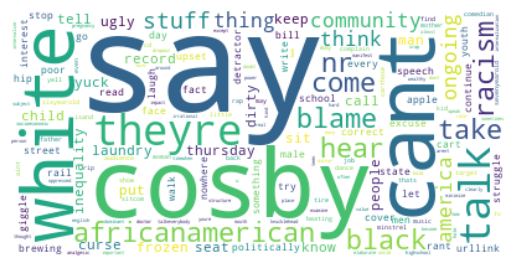

Run Time: 0.2838726043701172


In [35]:
start=time.time()
wordcloud=WordCloud(background_color='white',contour_width=3,contour_color='steelblue').generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
end=time.time()

print(f'Run Time: {end-start}')